# The Sparks Foundation GRIP program
### Data Science & Business Analytics Internship

### Task - 2 (Prediction using Unsupervised ML)

#### By - Dhananjay Pratap Lodhi

In [1]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
# storing the data into the variable "iris".

iris = load_iris()
dir(iris)     # returns first 10 entries

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
# creating a dataframe of the given data for easier analysis

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10)          # returns first 10 entries

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
# returns the number of rows and columns

df.shape

(150, 4)

In [5]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

This shows that the data does not contain any null values.

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This shows that there are three types of iris flowers in the dataset namely setosa, versicolor and virginica.

In [7]:
# Assigning the given targets representing the type of iris flower to a variable.

target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Objective - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

We can solve above objective using the elbow method.  
  
The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

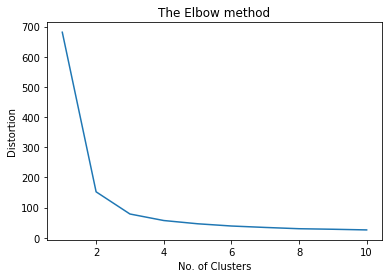

In [8]:
distortions = []       
# distortion refers to the sum of squared distances from each point to its assigned center.

K = range(1,11)

for i in K:
    model = KMeans(n_clusters=i, init='k-means++', random_state=0)
    model.fit(df)
    distortions.append(model.inertia_)

sns.lineplot(K, distortions)
plt.title('The Elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('Distortion')
plt.show()

#### From above graph, it is clear that optimal number of clusters = 3.
Now we can run a K-Means using as n_clusters the number 3.

### Predicting Values

In [9]:
model = KMeans(n_clusters=3)
model.fit(df)
predicted = model.predict(df)
predicted                         # predicted target values using KMeans algorithm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
# Adding the Actual target values and the Predicted target values to the dataframe.

df['target'] = target
df['Predicted'] = predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Predicted
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


### Actual vs KMeans clustering

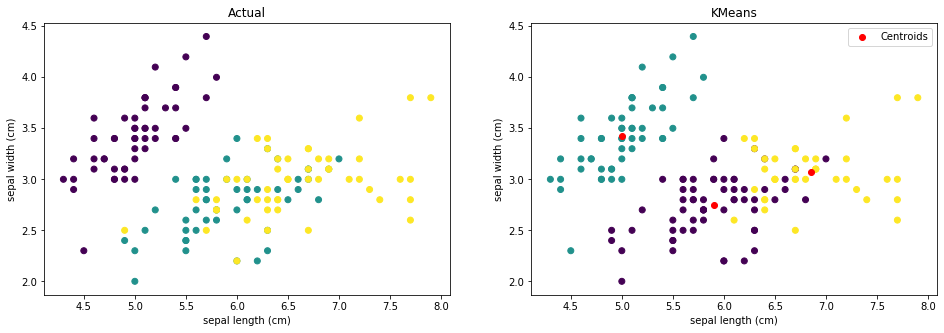

In [11]:
#Visualizing the clusters on the basis of first two columns.

plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Actual')

plt.subplot(1,2,2)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=predicted)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red', label='Centroids')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KMeans')
plt.legend()
plt.show()


Hence, We can say that the K-Means alogrithm does a really good job at defining the number of clusters in a given dataset.